In [91]:
import warnings
warnings.filterwarnings('ignore')

from keras import layers
from keras import models
from keras import optimizers
import datetime
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
from myfunctions import plot_confusion_matrix

# Setting Directories of Images

In [92]:
# Your code here
train_dir = '../data/genres_mel_spec/CNN_folders/train'
validation_dir = '../data/genres_mel_spec/CNN_folders/val/'
test_dir = '../data/genres_mel_spec/CNN_folders/test/'


# Loading in Images and scaling them

Original images are (360,1008,3). Given the large size of this have resized images to (280,504,3) so models will run at a resonable speed

In [141]:

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,target_size=(180,504),
        class_mode='categorical',shuffle=False)

validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(180,504),
                                                        class_mode='categorical',shuffle=False)

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(180,504),
                                                        class_mode='categorical',shuffle=False)

Found 6400 images belonging to 8 classes.
Found 797 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [67]:
# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
validation_images, validation_labels = next(validation_generator)

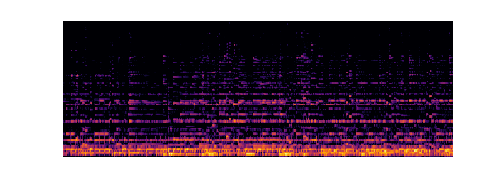

In [132]:
array_to_img(train_images[0])


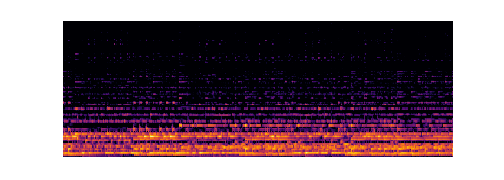

In [69]:
array_to_img(train_images[1])


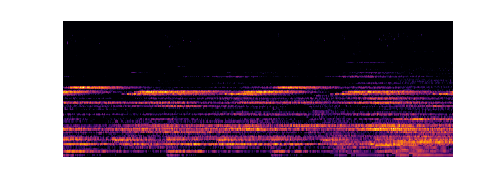

In [70]:
array_to_img(train_images[2])


In [71]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))
print(np.shape(validation_images))
print(np.shape(validation_labels))

(32, 180, 504, 3)
(32, 8)
(32, 180, 504, 3)
(32, 8)
(32, 180, 504, 3)
(32, 8)


# Building CNN

In [72]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D


In [78]:
from keras import layers
from keras import models
from keras import optimizers

cnnmodel = models.Sequential(name='cnn model')
cnnmodel.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180, 504, 3)))
cnnmodel.add(layers.MaxPooling2D((2, 2)))
cnnmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnnmodel.add(layers.MaxPooling2D((2, 2)))
cnnmodel.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnnmodel.add(layers.MaxPooling2D((2, 2)))
cnnmodel.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnnmodel.add(layers.MaxPooling2D((2, 2)))
cnnmodel.add(layers.Flatten())
cnnmodel.add(layers.Dense(512, activation='relu'))
cnnmodel.add(layers.Dropout(0.4))
cnnmodel.add(layers.Dense(8, activation='softmax'))

cnnmodel.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])


In [79]:
cnnhistory =cnnmodel.fit_generator(train_generator,
                         validation_data=validation_generator,
                        epochs=20,shuffle=False)

Epoch 1/20
200/200 [==============================] - 548s 3s/step - loss: 2.0590 - acc: 0.2052 - val_loss: 1.7618 - val_acc: 0.3350
Epoch 2/20
200/200 [==============================] - 555s 3s/step - loss: 1.7510 - acc: 0.3517 - val_loss: 1.6457 - val_acc: 0.3890
Epoch 3/20
200/200 [==============================] - 560s 3s/step - loss: 1.5530 - acc: 0.4416 - val_loss: 1.4990 - val_acc: 0.4718
Epoch 4/20
200/200 [==============================] - 563s 3s/step - loss: 1.3814 - acc: 0.5127 - val_loss: 1.4974 - val_acc: 0.4780
Epoch 5/20
200/200 [==============================] - 557s 3s/step - loss: 1.1963 - acc: 0.5833 - val_loss: 1.6092 - val_acc: 0.4718
Epoch 6/20
200/200 [==============================] - 559s 3s/step - loss: 0.9570 - acc: 0.6614 - val_loss: 1.7672 - val_acc: 0.4492
Epoch 7/20
200/200 [==============================] - 556s 3s/step - loss: 0.6947 - acc: 0.7570 - val_loss: 1.8848 - val_acc: 0.4567
Epoch 8/20
200/200 [==============================] - 555s 3s/step - 

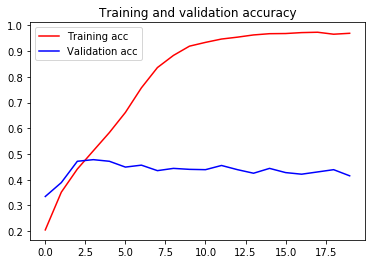

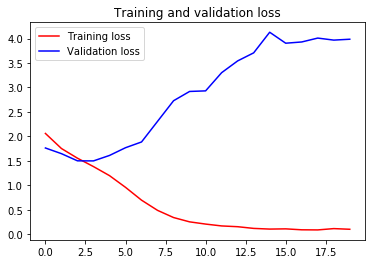

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = cnnhistory.history['acc']
val_acc = cnnhistory.history['val_acc']
loss = cnnhistory.history['loss']
val_loss = cnnhistory.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', c='r',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b',c='r' ,label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

cnnmodel.save('../savedmodels/cnn/cnnmodel.h5')



In [152]:
from keras.models import load_model
saved_model = load_model('../savedmodels/cnn/cnnmodel.h5')

# Data Augmentation

In [85]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(180, 504),
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(180, 504),class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(180,504),
                                                        class_mode='categorical')



Found 6400 images belonging to 8 classes.
Found 797 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [82]:
from keras import layers
from keras import models
from keras import optimizers

cnnmodel2 = models.Sequential(name='cnn model')
cnnmodel2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(180, 504, 3)))
cnnmodel2.add(layers.MaxPooling2D((2, 2)))
cnnmodel2.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnnmodel2.add(layers.MaxPooling2D((2, 2)))
cnnmodel2.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnnmodel2.add(layers.MaxPooling2D((2, 2)))
cnnmodel2.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnnmodel2.add(layers.MaxPooling2D((2, 2)))
cnnmodel2.add(layers.Flatten())
cnnmodel2.add(layers.Dense(512, activation='relu'))
cnnmodel2.add(layers.Dropout(0.4))
cnnmodel2.add(layers.Dense(8, activation='softmax'))

cnnmodel2.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])


In [83]:
history_cnn2 = cnnmodel2.fit_generator(train_generator, 
                              epochs=10, 
                              validation_data=validation_generator)

Epoch 1/15
200/200 [==============================] - 565s 3s/step - loss: 2.1049 - acc: 0.1669 - val_loss: 1.9929 - val_acc: 0.1957
Epoch 2/15
200/200 [==============================] - 563s 3s/step - loss: 2.3155 - acc: 0.1647 - val_loss: 2.0845 - val_acc: 0.1255
Epoch 3/15
200/200 [==============================] - 564s 3s/step - loss: 2.0811 - acc: 0.1248 - val_loss: 2.0801 - val_acc: 0.1242
Epoch 4/15
200/200 [==============================] - 565s 3s/step - loss: 2.0805 - acc: 0.1275 - val_loss: 2.0796 - val_acc: 0.1242
Epoch 5/15
200/200 [==============================] - 559s 3s/step - loss: 2.0805 - acc: 0.1216 - val_loss: 2.0796 - val_acc: 0.1242
Epoch 6/15
200/200 [==============================] - 561s 3s/step - loss: 2.0808 - acc: 0.1155 - val_loss: 2.0795 - val_acc: 0.1255
Epoch 7/15
200/200 [==============================] - 564s 3s/step - loss: 2.0803 - acc: 0.1220 - val_loss: 2.0794 - val_acc: 0.1255
Epoch 8/15
200/200 [==============================] - 561s 3s/step - 

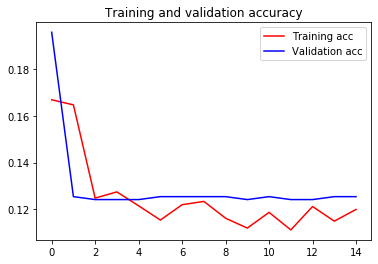

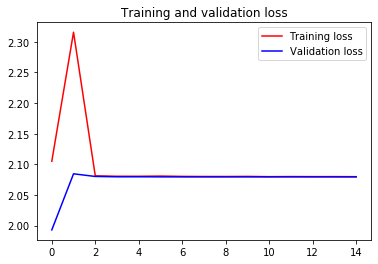

test acc: 0.125
train acc: 0.125


In [84]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history_cnn2.history['acc']
val_acc = history_cnn2.history['val_acc']
loss = history_cnn2.history['loss']
val_loss = history_cnn2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', c='r',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b',c='r' ,label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

cnnmodel2.save('../savedmodels/cnn/cnnmodel2.h5')

test_loss, test_acc = cnnmodel2.evaluate_generator(test_generator)
print('test acc:', test_acc)

train_loss, train_acc = cnnmodel2.evaluate_generator(train_generator)
print('train acc:', train_acc)

This model is equal to random chance

In [155]:
# Confution Matrix and Classification Report

Y_pred = cnnmodel2.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)


Accuracy: 0.125000
Precision: 0.015625
Recall: 0.125000
F1 score: 0.027778


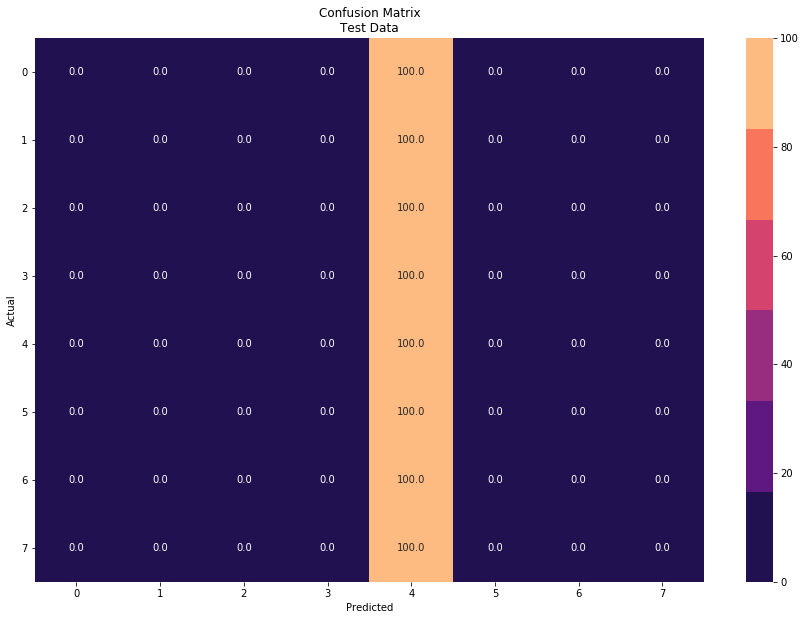

In [156]:
plot_confusion_matrix(test_generator.classes, y_pred,'Test')

In [ ]:
This model just predicts everything to be 4.

# Transfer Learning

In [99]:
from keras import models,layers

In [229]:
# from keras.preprocessing.image import ImageDataGenerator, array_to_img

# Initialize Base
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(180, 504, 3))

# Define Model Architecture
tlmodel = models.Sequential()
tlmodel.add(cnn_base)
tlmodel.add(layers.Flatten())
tlmodel.add(layers.Dense(64, activation='relu'))
tlmodel.add(layers.Dense(128, activation='relu'))
tlmodel.add(layers.Dense(64, activation='relu'))
tlmodel.add(layers.Dense(8, activation='softmax'))

cnn_base.trainable = False

# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model.layers:
    print(layer.name, layer.trainable)
    
# Similarly, we can check how many trainable weights are in the model 
print(len(tlmodel.trainable_weights))

tlmodel.summary()

conv2d_38 True
max_pooling2d_36 True
conv2d_39 True
max_pooling2d_37 True
flatten_12 True
dense_23 True
dropout_9 True
dense_24 True
8
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 5, 15, 512)        20024384  
_________________________________________________________________
flatten_18 (Flatten)         (None, 38400)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)                2457664   
_________________________________________________________________
dense_40 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 8)                 520       
Total p

In [101]:
start = datetime.datetime.now()

# Compilation
tlmodel.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

# Fitting the Model
tlhistory = tlmodel.fit_generator(train_generator,
                              steps_per_epoch=50,
                              epochs=15,
                              validation_data=validation_generator,
                              validation_steps=50)


end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Epoch 1/15
50/50 [==============================] - 1273s 25s/step - loss: 2.5161 - acc: 0.1975 - val_loss: 2.0827 - val_acc: 0.1832
Epoch 2/15
50/50 [==============================] - 1498s 30s/step - loss: 1.8553 - acc: 0.3075 - val_loss: 1.6912 - val_acc: 0.4015
Epoch 3/15
50/50 [==============================] - 1292s 26s/step - loss: 1.7143 - acc: 0.3856 - val_loss: 1.7908 - val_acc: 0.3325
Epoch 4/15
50/50 [==============================] - 1180s 24s/step - loss: 1.7363 - acc: 0.3631 - val_loss: 1.6751 - val_acc: 0.3626
Epoch 5/15
50/50 [==============================] - 1135s 23s/step - loss: 1.5962 - acc: 0.4206 - val_loss: 1.5681 - val_acc: 0.4492
Epoch 6/15
50/50 [==============================] - 1142s 23s/step - loss: 1.5505 - acc: 0.4462 - val_loss: 1.6221 - val_acc: 0.4115
Epoch 7/15
50/50 [==============================] - 1080s 22s/step - loss: 1.5362 - acc: 0.4431 - val_loss: 1.5056 - val_acc: 0.4567
Epoch 8/15
50/50 [==============================] - 1124s 22s/step - 

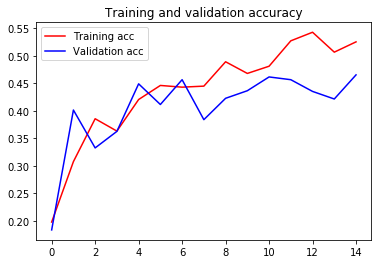

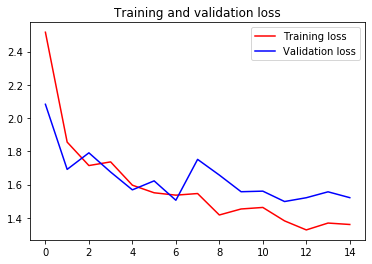

train acc: 0.560625
test acc: 0.45375


In [102]:
# Your code here; visualize the training / validation history associated with fitting the model

import matplotlib.pyplot as plt
%matplotlib inline 

acc = tlhistory.history['acc']
val_acc = tlhistory.history['val_acc']
loss = tlhistory.history['loss']
val_loss = tlhistory.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b',c='r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', c='r',label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

tlmodel.save('../savedmodels/cnn/tlmodel.h5')

train_loss, train_acc = tlmodel.evaluate_generator(train_generator,steps=50)
print('train acc:', train_acc)

test_loss, test_acc = tlmodel.evaluate_generator(test_generator,steps=50)
print('test acc:', test_acc)

In [227]:
tlmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 5, 15, 512)        20024384  
_________________________________________________________________
flatten_16 (Flatten)         (None, 38400)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                2457664   
_________________________________________________________________
dense_32 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 520       
Total params: 22,499,144
Trainable params: 2,474,760
Non-trainable params: 20,024,384
________________________________________________________

In [162]:
# Confution Matrix and Classification Report

Y_pred = tlmodel.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)


In [163]:
train_generator.class_indices

{'Electronic': 0,
 'Experimental': 1,
 'Folk': 2,
 'Hip-Hop': 3,
 'Instrumental': 4,
 'International': 5,
 'Pop': 6,
 'Rock': 7}

In [183]:
list(test_generator.class_indices.keys())

['Electronic',
 'Experimental',
 'Folk',
 'Hip-Hop',
 'Instrumental',
 'International',
 'Pop',
 'Rock']

In [222]:

def plot_confusion_matrix(y,yhat,data='test',normalize=None):
    
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y, yhat)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y,yhat,average='macro')
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y,yhat,average='macro')
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y,yhat,average='macro')
    print('F1 score: %f' % f1)
   
    cm_test = confusion_matrix(y,yhat,normalize=normalize)
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    sns.heatmap(cm_test,cmap=sns.color_palette('magma'),fmt ='.1f',annot=True,ax=ax)
    plt.title(f"Confusion Matrix\n{data} Data")
    plt.ylim([8,0])
    plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticklabels(labels, rotation=0)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [223]:
labels = list(test_generator.class_indices.keys())

In [224]:
labels

['Electronic',
 'Experimental',
 'Folk',
 'Hip-Hop',
 'Instrumental',
 'International',
 'Pop',
 'Rock']

Accuracy: 0.453750
Precision: 0.503079
Recall: 0.453750
F1 score: 0.447238


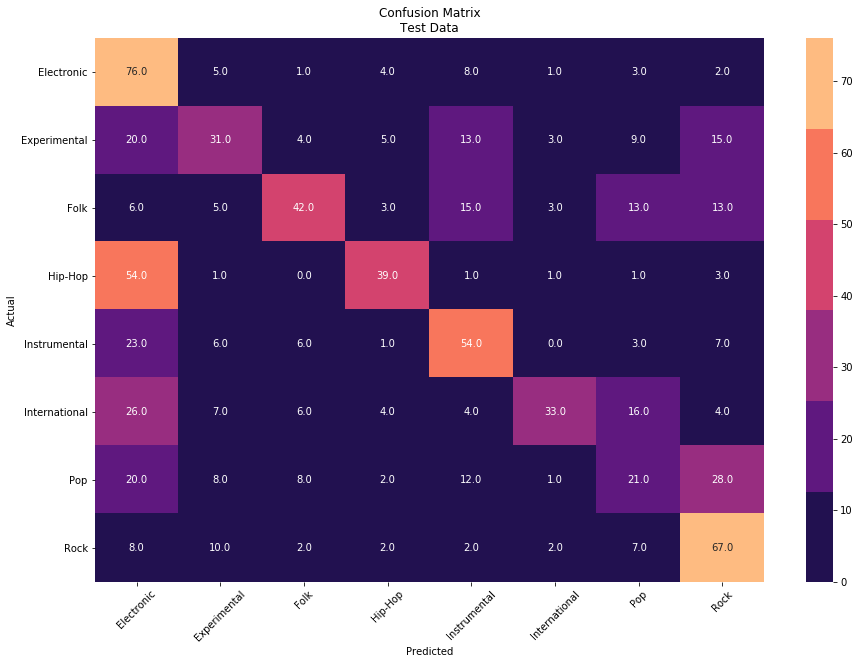

In [225]:
plot_confusion_matrix(test_generator.classes, y_pred,'Test')

Accuracy: 0.453750
Precision: 0.503079
Recall: 0.453750
F1 score: 0.447238


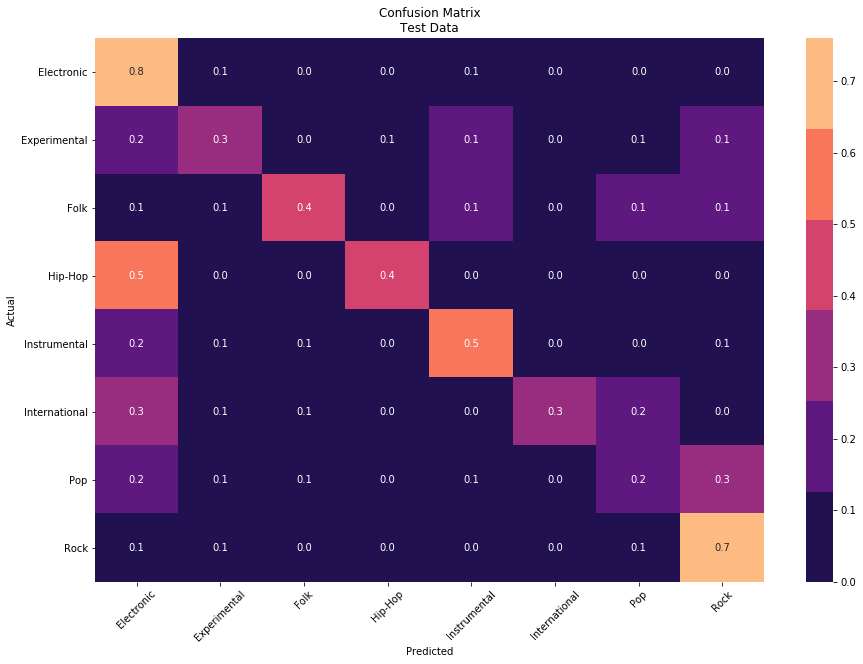

In [226]:
plot_confusion_matrix(test_generator.classes, y_pred,'Test',normalize='true')

In [175]:
test_generator.class_indices

{'Electronic': 0,
 'Experimental': 1,
 'Folk': 2,
 'Hip-Hop': 3,
 'Instrumental': 4,
 'International': 5,
 'Pop': 6,
 'Rock': 7}